# 第3回演習「進化の力でクイズ王に挑戦」

この演習では遺伝的アルゴリズムを用いたプログラムの記述方法を習得します。<hr />

## 【例題】
人工知能のケロリンパ君は、その能力を生かし、サイバー大学に関する知識を問う「サイバークイズ選手権」に挑戦しようとしています。

<img src="https://pfe.p.cyber-u.ac.jp/img/Python/Week3_GA/kero.png" style="width:200px">

このクイズ選手権では、例えばこのような3択の問題が出題されます。

<img src="http://pfe.p.cyber-u.ac.jp/img/Python/Week3_GA/quiz.png" style="width:300px">

合計10問あるのですが、ケロリンパ君は井の中の蛙として育ってきたため、サイバー大学に関する知識がありません。
仕方がないので、当てずっぽうで全ての問題に答えようとしましたが、10問全てに正解し満点を取るためには約6万回も繰り返し答え続けないといけません。もう少し、効率の良い答え方はないのでしょうか。

このようなケロリンパ君の挑戦は「組み合わせ最適化」と呼ばれる分野に該当します。そして、今回扱う組み合わせ最適化の方法が「遺伝的アルゴリズム」です。プログラムでは、まずクイズに答えるための個体をクラスとして定義します。「回答リスト」の部分は、この個体が10問それぞれにどう答えるか、をリストで表すものです。「評点」には、この個体がクイズ10問に答えて得た合計得点が入ります。


<img src="https://pfe.p.cyber-u.ac.jp/img/Python/Week3_GA/gene.png" style="width:300px">

In [2]:
class クイズに答える個体(object):
    def __init__(self,回答リスト,評点):
        self.回答リスト=回答リスト
        self.評点=評点

次に、正解、集団、選択肢の数、などを変数として用意します。


In [3]:
正解=[3,1,2,2,2,3,1,3,3,1] # 全ての設問の正解をリストで表現
集団=[]
評点リスト=[] # 全個体の評点
選択肢数=3 # 3択
設問数=10 # 10問
個体数=10 # 集団の中の個体の数
点数1問ぶん=1 # 1問当たり1点
満点=設問数*点数1問ぶん # 満点は10点

ここからはしばらく、関数の定義が続きます。1つの個体を評価して評価値を返す関数、集団にある個体を全て評価する関数…

In [4]:
def 評価(この個体): # 個体の全問を読み込み、合計点数を返す
    評価値=0
    for 設問 in range(設問数):
        if この個体[設問] == 正解[設問]: # 正解なら評価値を増やす
            評価値 = 評価値 + 点数1問ぶん
    return 評価値

def 集団の個体を全て評価():
    for 個体 in range(個体数):
        集団[個体].評点=評価(集団[個体].回答リスト)

そしてここからは、遺伝的アルゴリズムの核となる突然変異や交叉の関数が続きます。

<img src="https://pfe.p.cyber-u.ac.jp/img/Python/Week3_GA/heni.png" style="width:200px">

<img src="https://pfe.p.cyber-u.ac.jp/img/Python/Week3_GA/kousa.png" style="width:200px">


In [5]:
def 突然変異(この個体,箇所):
    この個体[箇所]=この個体[箇所]%選択肢数+1 # 剰余により、選択肢は1->2,2->3,3->1 へと変異
    return(この個体)

def 交叉(案1番目,案2番目,交叉箇所): # [1,2,3,4,5] で交叉箇所が2なら、[1,2]と[3,4,5]に分割して他の遺伝子と入れ替える
    案1番目の前側=案1番目[0:交叉箇所]  # リストの交叉箇所まで
    案1番目の後ろ側=案1番目[交叉箇所:] # リストの最後まで
    案2番目の前側=案2番目[0:交叉箇所]  # リストの交叉箇所まで
    案2番目の後ろ側=案2番目[交叉箇所:] # リストの最後まで
    案1番目=案1番目の前側+案2番目の後ろ側 # つなげる
    案2番目=案2番目の前側+案1番目の後ろ側 # つなげる
    return(案1番目,案2番目)

最後に画面出力や評点一覧を得る下請け関数を加え、ここまでで関数の定義は終了です。

In [6]:
def 集団を画面出力():
    for 個体 in range(個体数):
        集団[個体].評点=評価(集団[個体].回答リスト)
        print(str(個体)+" ",end="")        
        print(集団[個体].回答リスト,end="")
        print(" ",end="")        
        print(集団[個体].評点)    

def 集団内の評点の一覧をリストとして得る():
    集団の評点リスト=[]    
    for 個体 in range(個体数):
        集団の評点リスト.append(集団[個体].評点)
    return 集団の評点リスト

## 【実行してみよう】

ここまで記述してきた内容に加え、関数を呼び出す側のメイン処理を加えたものをまとめて、以下に示します。下のプログラム中のどこかをクリックした状態で「シフトキー + リターンキー」を押すとプログラムが実行され、プログラムより下のところに出力結果が現れます。

In [29]:
import random
import copy

class クイズに答える個体(object):
    def __init__(self,回答リスト,評点):
        self.回答リスト=回答リスト
        self.評点=評点

正解=[2,1,2,2,2,1,1,2,1,1] # 全ての設問の正解をリストで表現
集団=[]
評点リスト=[] # 全個体の評点
選択肢数=3 # 3択
設問数=10 # 10問
個体数=10 # 集団の中の個体の数
点数1問ぶん=1 # 1問当たり1点
満点=設問数*点数1問ぶん # 満点は10点

def 評価(この個体): # 個体の全問を読み込み、合計点数を返す
    評価値=0
    for 設問 in range(設問数):
        if この個体[設問] == 正解[設問]: # 正解なら評価値を増やす
            評価値 = 評価値 + 点数1問ぶん
    return 評価値

def 集団の個体を全て評価():
    for 個体 in range(個体数):
        集団[個体].評点=評価(集団[個体].回答リスト)

def 突然変異(この個体,箇所):
    この個体[箇所]=この個体[箇所]%選択肢数+1 # 剰余により、選択肢は1->2,2->3,3->1 へと変異
    return(この個体)

def 交叉(案1番目,案2番目,交叉箇所): # [1,2,3,4,5] で交叉箇所が2なら、[1,2]と[3,4,5]に分割して他の遺伝子と入れ替える
    案1番目の前側=案1番目[0:交叉箇所]  # リストの交叉箇所まで
    案1番目の後ろ側=案1番目[交叉箇所:] # リストの最後まで
    案2番目の前側=案2番目[0:交叉箇所]  # リストの交叉箇所まで
    案2番目の後ろ側=案2番目[交叉箇所:] # リストの最後まで
    案1番目=案1番目の前側+案2番目の後ろ側 # つなげる
    案2番目=案2番目の前側+案1番目の後ろ側 # つなげる
    return(案1番目,案2番目)

def 集団を画面出力():
    for 個体 in range(個体数):
        集団[個体].評点=評価(集団[個体].回答リスト)
        print(str(個体)+" ",end="")        
        print(集団[個体].回答リスト,end="")
        print(" ",end="")        
        print(集団[個体].評点)    

def 集団内の評点の一覧をリストとして得る():
    集団の評点リスト=[]    
    for 個体 in range(個体数):
        集団の評点リスト.append(集団[個体].評点)
    return 集団の評点リスト

#### これよりメイン処理

#### 全個体が当てずっぽうに答え、集団の初期状態とする
for 個体 in range(個体数): # 個体の数だけ繰り返す
    回答リスト=[]
    for マッチ本数 in range(設問数): # 設問数ぶんのランダム回答を作る
        回答リスト.append(random.randint(1,選択肢数)) 
    評点=評価(回答リスト)
    集団.append(クイズに答える個体(回答リスト,評点)) 

print("初期状態 (第0世代)")    
集団を画面出力() # 集団の初期状態を画面出力する

print("正解")    
print(正解)

最大リスト = []
平均リスト = []

# 「選択と淘汰、交叉、突然変異」を100世代繰り返す (ただし満点の個体が現れたら打ち切る)
for 世代 in range(1,101):
    評点リスト=集団内の評点の一覧をリストとして得る()   
    print("第"+str(世代)+"世代の処理を始めます")
   
    #### 選択と淘汰 ####
    親を決める評点リスト=copy.deepcopy(評点リスト) # deepcopy により、参照でなく値をコピーする
    淘汰を決める評点リスト=copy.deepcopy(評点リスト) # deepcopy により、参照でなく値をコピーする

    最大個体=親を決める評点リスト.index(max(親を決める評点リスト))
    print("最高評点の個体"+str(最大個体)+"、",end="")
    親を決める評点リスト[最大個体]=-1
    次の最大個体=親を決める評点リスト.index(max(親を決める評点リスト))
    print("2番目に高い評点の個体"+str(次の最大個体))
    最大リスト.append(max(親を決める評点リスト))
    
    最小個体=淘汰を決める評点リスト.index(min(淘汰を決める評点リスト))
    print("最低評点の個体"+str(最小個体)+"、",end="")
    淘汰を決める評点リスト[最小個体]=満点+100
    次の最小個体=淘汰を決める評点リスト.index(min(淘汰を決める評点リスト))
    print("2番目に低い評点の個体"+str(次の最小個体))

    print("優秀な親2体を新個体としてコピーします") # 優秀な2個体を劣った2個体の位置に、複製
    集団[最小個体].回答リスト=copy.deepcopy(集団[最大個体].回答リスト)
    集団[次の最小個体].回答リスト=copy.deepcopy(集団[次の最大個体].回答リスト)

    集団の個体を全て評価()
    集団を画面出力()

    #### 新個体どうしの交叉 ####
    交叉箇所=random.randint(1,設問数-1)
    print("新個体どうしを箇所"+str(交叉箇所)+"で交叉します")
    新案=交叉(集団[最小個体].回答リスト, 集団[次の最小個体].回答リスト,交叉箇所) # 交叉された2つのリストが返る
    集団[最小個体].回答リスト=copy.deepcopy(新案[0]) # 交叉された1番目
    集団[次の最小個体].回答リスト=copy.deepcopy(新案[1]) # 交叉された2番目

    集団の個体を全て評価()
    集団を画面出力()

    #### 突然変異 ####
    突然変異箇所=random.randint(0,設問数-1)
    print("突然変異させます")
    print("最低評点の個体"+str(最小個体)+"における変異箇所: "+str(突然変異箇所))
    集団[最小個体].回答リスト=突然変異(集団[最小個体].回答リスト,突然変異箇所)

    突然変異箇所=random.randint(0,設問数-1)
    print("2番目に低い評点の個体"+str(次の最小個体)+"における変異箇所: "+str(突然変異箇所))
    集団[次の最小個体].回答リスト=突然変異(集団[次の最小個体].回答リスト,突然変異箇所)

    # この世代の終了後に、全個体を評点込みで出力
    集団の個体を全て評価()
    集団を画面出力()
    
    評点リスト=集団内の評点の一覧をリストとして得る() # 改めて評点リストを得る
    平均リスト.append(sum(評点リスト) / len(評点リスト))
    if 満点 in 評点リスト:
        print("第"+str(世代)+"世代で満点の個体が現れました!")
        break # 満点が出たら繰り返しは終了

    print("第"+str(世代)+"世代の処理を終わります")

初期状態 (第0世代)
0 [1, 2, 2, 2, 1, 1, 3, 3, 3, 3] 3
1 [2, 2, 3, 3, 3, 2, 3, 3, 3, 2] 1
2 [1, 3, 2, 2, 1, 3, 2, 1, 1, 2] 3
3 [3, 3, 2, 2, 2, 1, 1, 3, 2, 3] 5
4 [3, 2, 3, 3, 3, 1, 3, 3, 1, 3] 2
5 [1, 2, 2, 3, 3, 2, 1, 3, 2, 2] 2
6 [3, 1, 2, 3, 3, 3, 2, 1, 2, 3] 2
7 [2, 1, 3, 1, 2, 1, 3, 2, 3, 1] 6
8 [1, 3, 1, 1, 1, 3, 1, 3, 1, 2] 2
9 [3, 1, 1, 1, 1, 1, 3, 3, 3, 2] 2
正解
[2, 1, 2, 2, 2, 1, 1, 2, 1, 1]
第1世代の処理を始めます
最高評点の個体7、2番目に高い評点の個体3
最低評点の個体1、2番目に低い評点の個体4
優秀な親2体を新個体としてコピーします
0 [1, 2, 2, 2, 1, 1, 3, 3, 3, 3] 3
1 [2, 1, 3, 1, 2, 1, 3, 2, 3, 1] 6
2 [1, 3, 2, 2, 1, 3, 2, 1, 1, 2] 3
3 [3, 3, 2, 2, 2, 1, 1, 3, 2, 3] 5
4 [3, 3, 2, 2, 2, 1, 1, 3, 2, 3] 5
5 [1, 2, 2, 3, 3, 2, 1, 3, 2, 2] 2
6 [3, 1, 2, 3, 3, 3, 2, 1, 2, 3] 2
7 [2, 1, 3, 1, 2, 1, 3, 2, 3, 1] 6
8 [1, 3, 1, 1, 1, 3, 1, 3, 1, 2] 2
9 [3, 1, 1, 1, 1, 1, 3, 3, 3, 2] 2
新個体どうしを箇所5で交叉します
0 [1, 2, 2, 2, 1, 1, 3, 3, 3, 3] 3
1 [2, 1, 3, 1, 2, 1, 1, 3, 2, 3] 5
2 [1, 3, 2, 2, 1, 3, 2, 1, 1, 2] 3
3 [3, 3, 2, 2, 2, 1, 1, 3, 2, 3] 5
4 [3, 3, 2, 2, 2, 1,

9 [2, 1, 1, 2, 2, 1, 1, 2, 3, 1] 8
新個体どうしを箇所3で交叉します
0 [2, 1, 3, 2, 2, 1, 1, 2, 1, 1] 9
1 [2, 1, 1, 2, 2, 1, 1, 2, 1, 1] 9
2 [2, 1, 1, 2, 2, 1, 1, 2, 1, 1] 9
3 [2, 1, 2, 2, 2, 1, 1, 2, 3, 1] 9
4 [2, 1, 3, 2, 2, 1, 1, 2, 1, 1] 9
5 [2, 1, 2, 2, 2, 1, 1, 2, 3, 1] 9
6 [2, 1, 1, 2, 2, 1, 1, 2, 1, 1] 9
7 [3, 1, 2, 2, 2, 1, 1, 2, 1, 1] 9
8 [2, 2, 2, 2, 2, 1, 1, 2, 1, 1] 9
9 [2, 1, 1, 2, 2, 1, 1, 2, 3, 1] 8
突然変異させます
最低評点の個体4における変異箇所: 5
2番目に低い評点の個体6における変異箇所: 4
0 [2, 1, 3, 2, 2, 1, 1, 2, 1, 1] 9
1 [2, 1, 1, 2, 2, 1, 1, 2, 1, 1] 9
2 [2, 1, 1, 2, 2, 1, 1, 2, 1, 1] 9
3 [2, 1, 2, 2, 2, 1, 1, 2, 3, 1] 9
4 [2, 1, 3, 2, 2, 2, 1, 2, 1, 1] 8
5 [2, 1, 2, 2, 2, 1, 1, 2, 3, 1] 9
6 [2, 1, 1, 2, 3, 1, 1, 2, 1, 1] 8
7 [3, 1, 2, 2, 2, 1, 1, 2, 1, 1] 9
8 [2, 2, 2, 2, 2, 1, 1, 2, 1, 1] 9
9 [2, 1, 1, 2, 2, 1, 1, 2, 3, 1] 8
第20世代の処理を終わります
第21世代の処理を始めます
最高評点の個体0、2番目に高い評点の個体1
最低評点の個体4、2番目に低い評点の個体6
優秀な親2体を新個体としてコピーします
0 [2, 1, 3, 2, 2, 1, 1, 2, 1, 1] 9
1 [2, 1, 1, 2, 2, 1, 1, 2, 1, 1] 9
2 [2, 1, 1, 2, 2, 1, 1, 2, 1, 1]

↑何世代目で満点の個体が現れましたか?
乱数を使っているので、何度か実行するとそのたびに結果が変わります。結果の読み方と、プログラムの説明は第3回第2章の講義を見てください。

## 任意課題(1)

では、ここからが皆さんの出番です。上記のコードに変更を加え「世代が進むにつれて、集団の中の最大の評点が満点に近づいていく様子」を図示してください。matplotlib で折れ線グラフとして出力させるとよいでしょう。

## 任意課題(2)

これは任意課題(1)と似ています。上記のコードに変更を加え「世代が進むにつれて、集団の中の『平均の評点』が満点に上がっていく様子」を図示してください。これも、matplotlib で折れ線グラフとして出力させるとよいでしょう。

## 任意課題(3)

上記のコードに変更を加え、「突然変異を行わない」ようにしてみましょう。満点を取る個体は現れやすくなるでしょうか? それとも現れにくくなるでしょうか? 実行して調べてみましょう。

[5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]
[3.4, 4.1, 4.7, 5.5, 5.8, 6.1, 6.4, 6.7, 7.1, 7.4, 7.6, 7.9, 8.1, 8.3, 8.6, 8.6, 8.7, 8.7, 8.7, 8.7, 8.7, 8.7, 8.7, 8.8, 8.8, 8.8, 8.8, 8.8, 8.8, 8.8, 8.8, 8.8, 8.8, 8.9, 8.8, 9.0]
----
0
5
3.4
----
1
5
4.1
----
2
6
4.7
----
3
6
5.5
----
4
6
5.8
----
5
7
6.1
----
6
7
6.4
----
7
7
6.7
----
8
8
7.1
----
9
8
7.4
----
10
8
7.6
----
11
8
7.9
----
12
9
8.1
----
13
9
8.3
----
14
9
8.6
----
15
9
8.6
----
16
9
8.7
----
17
9
8.7
----
18
9
8.7
----
19
9
8.7
----
20
9
8.7
----
21
9
8.7
----
22
9
8.7
----
23
9
8.8
----
24
9
8.8
----
25
9
8.8
----
26
9
8.8
----
27
9
8.8
----
28
9
8.8
----
29
9
8.8
----
30
9
8.8
----
31
9
8.8
----
32
9
8.8
----
33
9
8.9
----
34
9
8.8
----
35
9
9.0


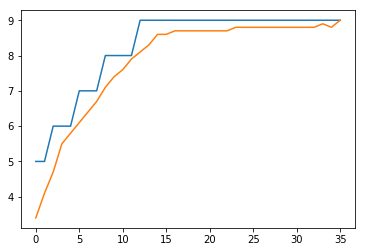

In [33]:
# 任意課題はこちらで↓
import matplotlib.pyplot as plt
print(最大リスト)
print(平均リスト)
for i in range(len(最大リスト)):
    print('----')
    print(i)
    print(最大リスト[i])
    print(平均リスト[i])

plt.plot(最大リスト)
plt.plot(平均リスト)